# Demonstration for Covid Dataset Visualization

Here was show how to use each of the custom class methods (defined in the Visualizer.py file) as well as the functions made in the text of the Juypter Notebook that help to determine the hyperparameters of the machine learning model. 

In [1]:
# Begin by importing all the modules that we will need as well as the custom class. Read in the dataset as a csv file 
from Visualizer import Hospital
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.svm import SVR 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs


hospital = pd.read_csv("COVID_data.csv")

In [37]:
# The functions that we defined outside of the custom class are as follows:
def tree_depth_finder(range_min, range_max, train_x, train_y, test_x, test_y):
    fig, ax = plt.subplots(1, figsize= (10, 10))
    depths = range(range_min, range_max)
    train_scores = []
    test_scores = []
    
    for d in depths:
        T = tree.DecisionTreeClassifier(max_depth=d) # create a model with that depth
        T2 = T.fit(train_x, train_y, d) # train the model 
        train_score = T2.score(train_x, train_y) # find the score for the training and testing
        test_score = T2.score(test_x, test_y)
    
        train_scores.append(train_score)
        test_scores.append(test_score)
        
        
        # This is somewhat subjective, but we will estimate the overfitting is likely when we have a difference 
        ## between the test and training scores that is larger than 1/4 of the score itself
        if ((train_score - test_score) > (0.10 *test_score))  &  ((train_score - test_score) < (0.15 *test_score)):
            ax.text(d, train_score, "There is likely overfitting beginning here")

    # Plot both the training and testing data for all of the depths so the user can see them 
    ax.scatter(depths, train_scores, label='train score')
    ax.scatter(depths, test_scores, label='test score')
    ax.set(xlabel="depth", ylabel= 'score')
    plt.legend(fontsize=20)
    plt.show()



def forest_depth_finder(n_min, n_max, train_x, train_y, test_x, test_y):
    fig, ax = plt.subplots(1, figsize= (10, 8))
    estimators = range(n_min, n_max)
    train_scores = []
    test_scores = []
    
    for e in estimators:
        clf = RandomForestClassifier(n_estimators= e) # make this the depth of the model 
        clf2 = clf.fit(X_train, y_train) #train the data 
        train_score = clf2.score(X_train, y_train) # score the data 
        test_score = clf2.score(X_test, y_test)
    
        train_scores.append(train_score)
        test_scores.append(test_score)
        
        # Then lets try to find a point in the data where we think there might be overfitting occuring
        if ((train_score - test_score) > (0.05 *test_score))  &  ((train_score - test_score) < (0.16 *test_score)):
            ax.text(e, train_score, "There is likely overfitting beginning here")

    # plot the data
    ax.scatter(estimators, train_scores, label='train score')
    ax.scatter(estimators, test_scores, label='test score')
    ax.set(xlabel="n_estimators", ylabel= 'score')
    plt.legend(fontsize=20)
    plt.show()


In [19]:
# Let's create small example of random data, non-covid related to test these functions on:
# We will read in the titanic dataset used in the lectures 

titanic = pd.read_csv("titanic.csv")
y = titanic["Survived"]
X = titanic.drop(['Survived', "Name"], axis=1) 
from sklearn import preprocessing # scikit-learn is actually sklearn
le = preprocessing.LabelEncoder() # makes an instance of labelencoder
X['Sex'] = le.fit_transform(X['Sex'])

# Then split the data into training and testing for the models 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


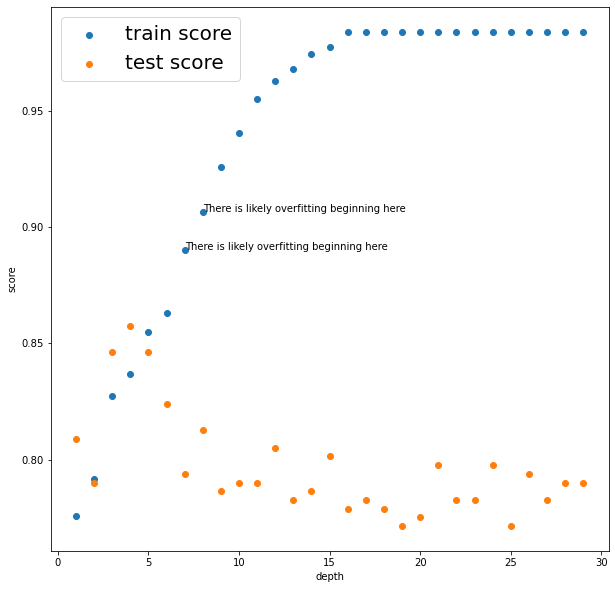

In [25]:
# Now we can try to run both of the functions we created 

tree_depth_finder(1,30,X_train, y_train, X_test, y_test)

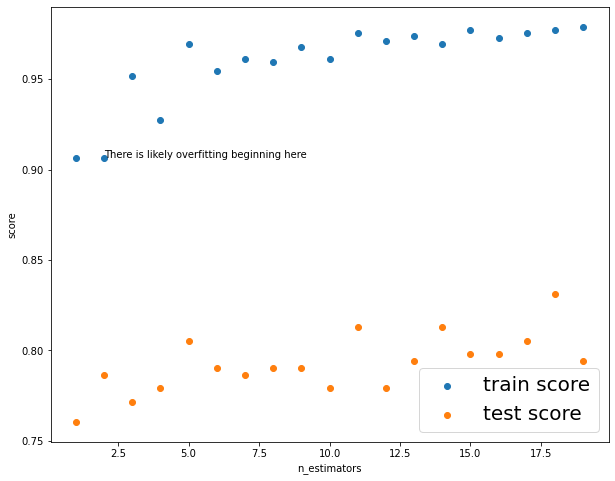

In [38]:
# And we can also test the other function that we made for the random tree classifier 

forest_depth_finder(1,20, X_train, y_train, X_test, y_test)


In [5]:
# Now we can use the examples of the visualizer functions that we created in the custom class with the covid dataset 

covid_data = Hospital(hospital)

# Test the length function 
print(len(covid_data))

604660


In [2]:
# Now we can use the examples of the visualizer functions that we created in the custom class with the covid dataset 

covid_data.summary(["state","total_staffed_pediatric_icu_beds_7_day_coverage"], "state")


total_staffed_pediatric_icu_beds_7_day_coverage                      \
                                                count      mean       std   
state                                                                       
AK                                             1708.0  6.527518  1.684504   
AL                                            11695.0  2.672168  3.383668   
AR                                            10368.0  6.720583  1.223525   
AS                                               66.0  6.515152  1.647772   
AZ                                             8972.0  5.960878  2.314510   
CA                                            42731.0  6.768318  0.932779   
CO                                            10860.0  6.408564  1.810840   
CT                                             3840.0  6.825521  0.888862   
DC                                             1210.0  4.232231  3.289422   
DE                                              959.0  6.719499  1.283241   
FL                                            24870.0  6.356172  1.949491   
GA                                            17239.0  4.380997  3.273736   
GU                                              242.0  6.289256  2.061052   
HI                                             2911.0  5.808313  2.454748   
IA                                            14072.0  3.646106  3.450222   
ID                                             5440.0  5.588787  2.554323   
IL                                            21656.0  6.619874  1.452024   
IN                                            14986.0  4.363606  3.205077   
KS                                            16280.0  6.566339  1.551863   
KY                                            11857.0  2.946782  3.420628   
LA                                            17617.0  2.508429  3.343838   
MA                                             8788.0  3.259786  3.454461   
MD                                             5944.0  6.839838  0.920308   
ME                                             3977.0  6.261755  2.029493   
MI                                            17140.0  4.857410  3.112676   
MN                                            15243.0  6.722168  1.227885   
MO                                            13885.0  6.788333  1.085608   
MP                                              101.0  5.683168  2.553158   
MS                                            11875.0  6.689095  1.323787   
MT                                             7189.0  4.379330  3.053743   
NC                                            13373.0  3.888507  3.313340   
ND                                             5435.0  3.020791  3.299174   
NE                                            11287.0  3.154071  3.354334   
NH                                             3146.0  5.349650  2.884826   
NJ                                             8800.0  3.950000  3.407105   
NM                                             4737.0  4.440785  3.022915   
NV                                             5197.0  2.516837  3.328377   
NY                                            19741.0  6.723672  1.253074   
OH                                            21956.0  4.948670  3.096689   
OK                                            14717.0  5.309982  2.773499   
OR                                             7234.0  6.084462  2.170316   
PA                                            21300.0  6.599061  1.444531   
PR                                             6656.0  4.480919  3.207092   
RI                                             1314.0  6.011416  2.224086   
SC                                             7867.0  6.828016  0.952622   
SD                                             6859.0  6.642659  1.417363   
TN                                            13040.0  3.182669  3.447356   
TX                                            54079.0  4.328094  3.343727   
UT                                             6037.0  6.686102  1.346901   
VA

Now we can also look at some visual representations of the data 

Here we select whatever columns we are interested in visualizing. 
Here we will look at the number of covid cases among the staff of the hospital 

This one line will compare all of the different columns that we select against both the collection week (as a measure of time) and the state of the hospital 


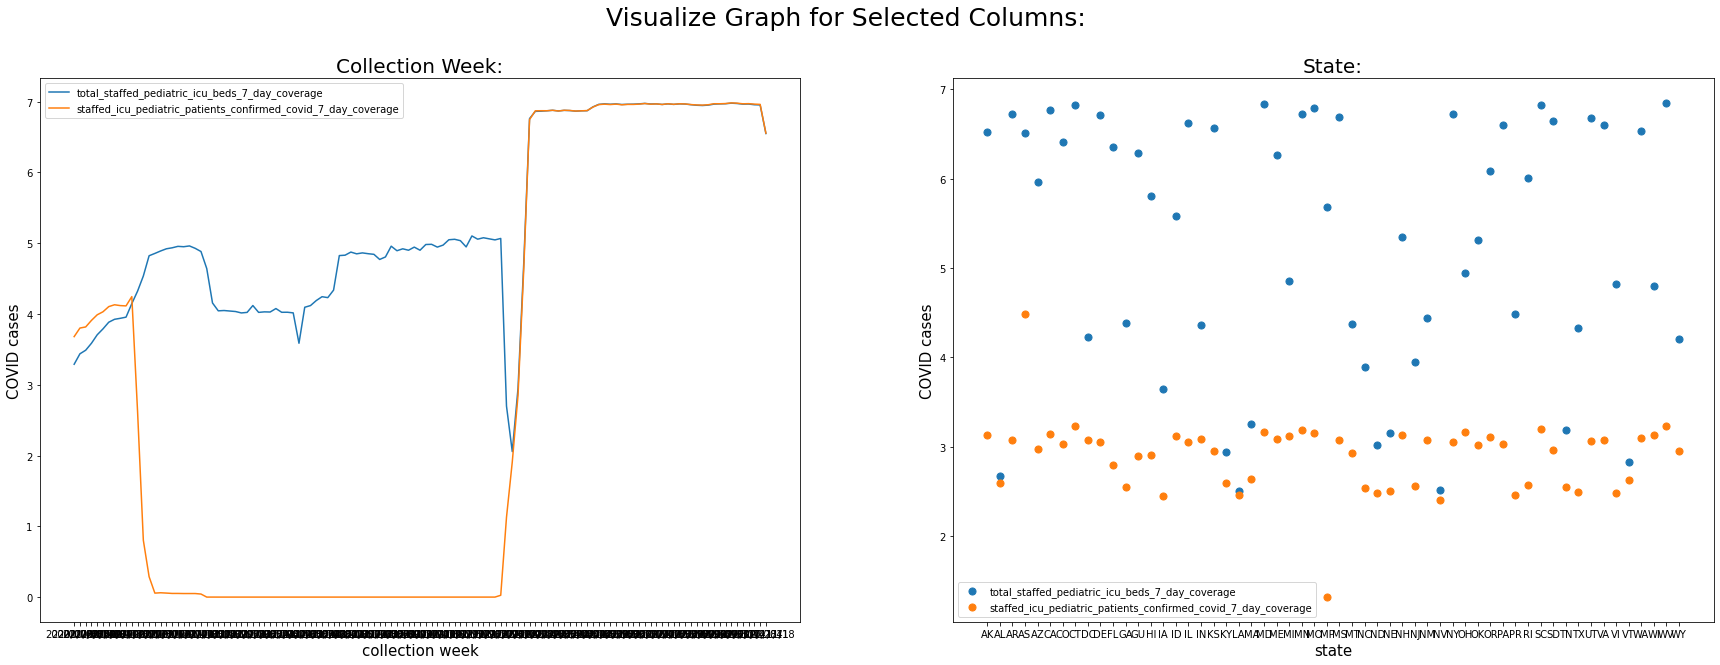

In [4]:
covid_data.visualizer(["total_staffed_pediatric_icu_beds_7_day_coverage", "staffed_icu_pediatric_patients_confirmed_covid_7_day_coverage"])
